In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# prepocessing normalize
from sklearn.preprocessing import  StandardScaler
#models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# metrics
from sklearn.metrics  import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')


In [13]:
df= pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv', sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [14]:
df.shape

(69301, 13)

In [59]:
df.to_csv('D:\sandip\Cardio.csv')

In [15]:

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.drop ('id',axis=1,inplace= True)
df.drop_duplicates(inplace=True)

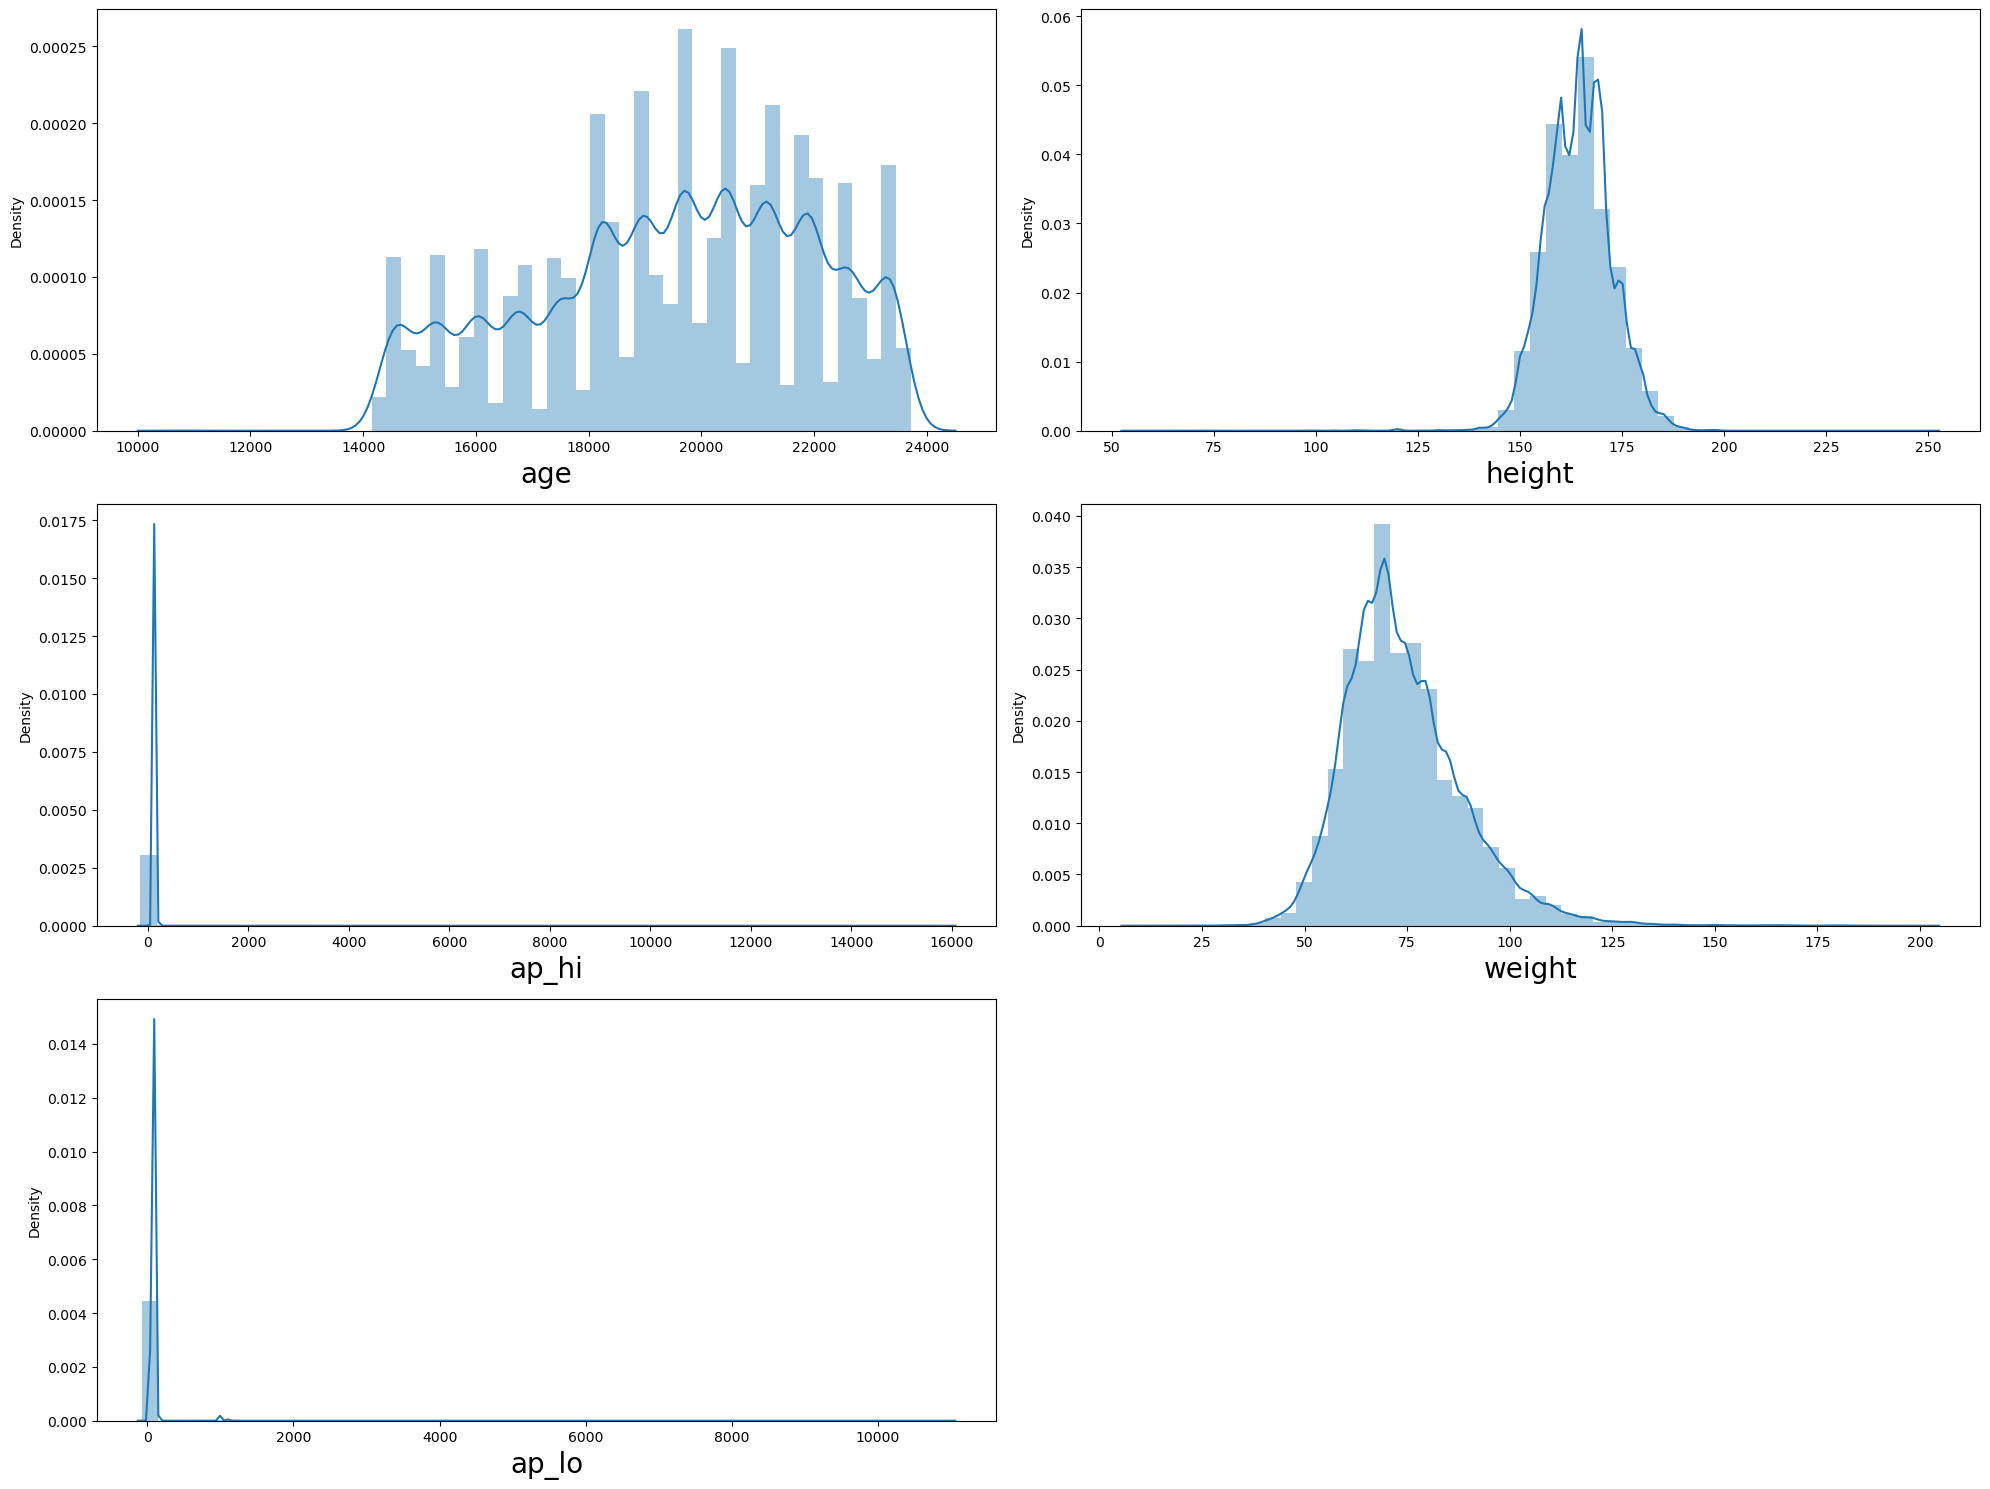

In [17]:

plt.figure(figsize=(20,15))
plotnumber= 1
for column in df[['age','height','ap_hi','weight','ap_lo']]:
    if plotnumber<= 6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber +=1
plt.tight_layout()

In [18]:
from scipy.stats import zscore
z_score=zscore(df[['age','height','ap_hi','weight','ap_lo']])
ads_z_score=np.abs(z_score)
filtering_entry=(ads_z_score< 3).all (axis=1)
df=df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000,67360.000000
mean,19466.779053,1.347268,164.374555,73.566278,126.164430,81.286001,1.362010,1.223575,0.087159,0.053281,0.803949,0.492815
std,2467.040240,0.476105,7.690310,13.195627,17.860035,10.236086,0.677075,0.569505,0.282069,0.224595,0.397011,0.499952
min,14275.000000,1.000000,140.000000,32.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17660.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [19]:

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [20]:
df.shape

(67360, 12)

In [21]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [22]:
x=df.drop(columns=['cardio'],axis=1)
y=df['cardio']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

In [31]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\=============Train Result=================')
        
        print(f'Accurancy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print('\=============Train Result=================')
        
        print(f'Accurancy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n \n Test clarssification Report \n', classification_report(y_test,pred,digits=2))

In [32]:
random_clf=RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [33]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

\=============Train Result=================
Accurancy Score: 99.99%
\=============Train Result=================
Accurancy Score: 71.16%

 
 Test clarssification Report 
               precision    recall  f1-score   support

           0       0.71      0.73      0.72     10243
           1       0.71      0.69      0.70      9965

    accuracy                           0.71     20208
   macro avg       0.71      0.71      0.71     20208
weighted avg       0.71      0.71      0.71     20208



    #parameter using of gridsearch

# random forest calssifire
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6]
       }

grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best Params=>',grd.best_params_)

In [39]:
random_clf=grd.best_estimator_

In [40]:
random_clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=11, n_estimators=15)

In [41]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)

\=============Train Result=================
Accurancy Score: 74.68%
\=============Train Result=================
Accurancy Score: 73.54%

 
 Test clarssification Report 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75     10243
           1       0.76      0.68      0.72      9965

    accuracy                           0.74     20208
   macro avg       0.74      0.73      0.73     20208
weighted avg       0.74      0.74      0.73     20208



# Roc AUC curve 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [49]:
lr= LogisticRegression()
kn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf= RandomForestClassifier()

In [50]:
x=df.drop(columns=['cardio'],axis=1)
y=df['cardio']
    
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=41)

lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('All models are trained')


All models are trained


In [51]:
lr.score(x_test,y_test)
kn.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)

print('All  models are test score captured')

All  models are test score captured


# RoC AUC curve for  fitted  models

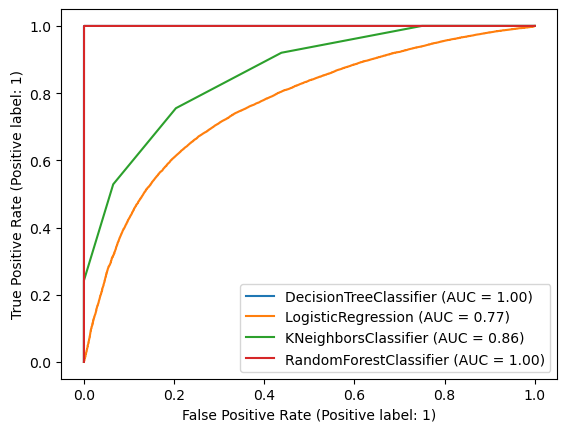

In [52]:
disp= plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

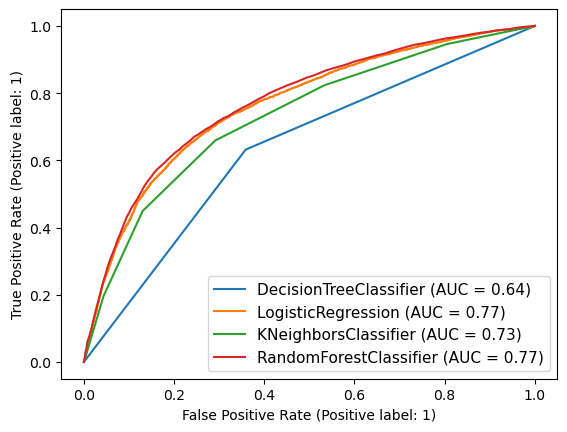

In [54]:
disp= plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [62]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [88]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/boston_house_rent.csv')

In [89]:
data.to_csv("D:\sandip\house_csv")

In [90]:
data.shape

(506, 14)

In [91]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [92]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [93]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [94]:
corr=data.corr()
corr.shape

(14, 14)

In [95]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


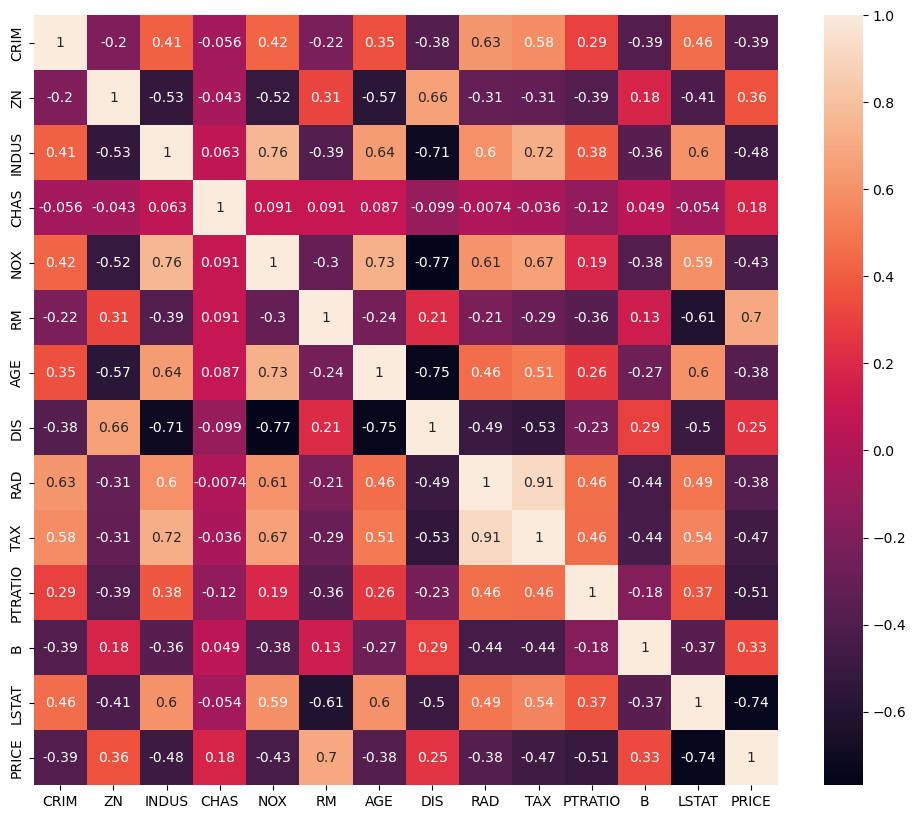

In [96]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True)
plt.show()

# Seems RAD AND TAX correleted

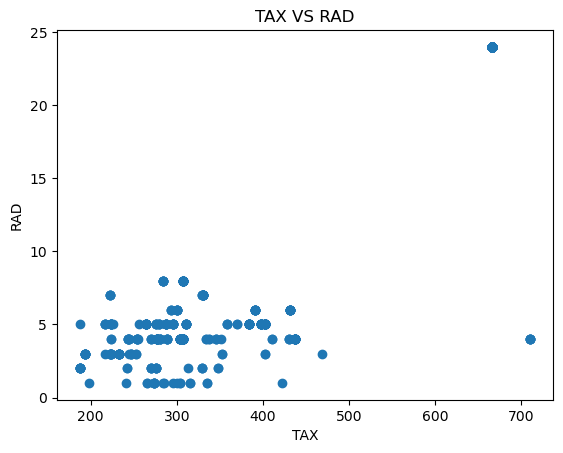

In [97]:
plt.scatter(data.TAX,data.RAD)
plt.xlabel('TAX')
plt.ylabel('RAD')
plt.title('TAX VS RAD')
plt.show()

In [98]:
x=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

# ADABoost model REgreation

In [101]:
from sklearn.ensemble import AdaBoostRegressor

In [102]:
ada=AdaBoostRegressor()

In [103]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [104]:
y_pred=ada.predict(x_train)

In [105]:
y_pred[:6]

array([18.62711864, 20.90909091, 21.516     , 26.78181818, 20.48461538,
       26.76416667])

In [106]:
accuracy= metrics.r2_score(y_train,y_pred)
print('R Square Score :',accuracy)

R Square Score : 0.9076479882658502


In [107]:
y_test_pred=ada.predict(x_test)

In [108]:
accuracy= metrics.r2_score(y_test,y_test_pred)
print('R Square Score :',accuracy)

R Square Score : 0.8019217245921572


# HYperparameter turning  using Randamized serch cv

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
params={'n_estimators':[47,50,60,70],'learning_rate':[0.25,0.30,0.40]}

In [117]:
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)

In [118]:
rnd_srch.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.4],
                                        'n_estimators': [47, 50, 60, 70]})

In [119]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.4, n_estimators=70)

In [121]:
ada=AdaBoostRegressor(learning_rate=0.25,n_estimators=62)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)

print('*** accurancy post tuning *****')
print(metrics.r2_score(y_test,y_pred))

*** accurancy post tuning *****
0.8590914800886441


# GBDT=Gradient Booested Tree

In [132]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib  inline


In [147]:
row=pd.read_csv('Heart.csv')

In [148]:
row.to_csv("D:\Sandip\Heart.csv")

In [149]:
row.head

<bound method NDFrame.head of      Unnamed: 0.1  Unnamed: 0  age  sex  cp  trestbps  chol  fbs  restecg  \
0               0           0   63    1   3       145   233    1        0   
1               1           1   37    1   2       130   250    0        1   
2               2           2   41    0   1       130   204    0        0   
3               3           3   56    1   1       120   236    0        1   
4               4           4   57    0   0       120   354    0        1   
..            ...         ...  ...  ...  ..       ...   ...  ...      ...   
298           298         298   57    0   0       140   241    0        1   
299           299         299   45    1   3       110   264    0        1   
300           300         300   68    1   0       144   193    1        1   
301           301         301   57    1   0       130   131    0        1   
302           302         302   57    0   1       130   236    0        0   

     thalach  exang  oldpeak  slope  ca  thal

In [150]:
row.describe()

,Unnamed: 0.1,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,151.000000,151.000000,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,87.612784,87.612784,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,0.000000,0.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.500000,75.500000,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,151.000000,151.000000,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,226.500000,226.500000,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,302.000000,302.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [151]:
row.head()

,Unnamed: 0.1,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [153]:
row.drop('Unnamed: 0.1',axis=1,inplace=True)
row.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [154]:
row.drop('Unnamed: 0',axis=1,inplace=True)
row.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [155]:
row.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [156]:
row.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [158]:
row.drop('target',axis=1).corrwith(row.target)

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
dtype: float64

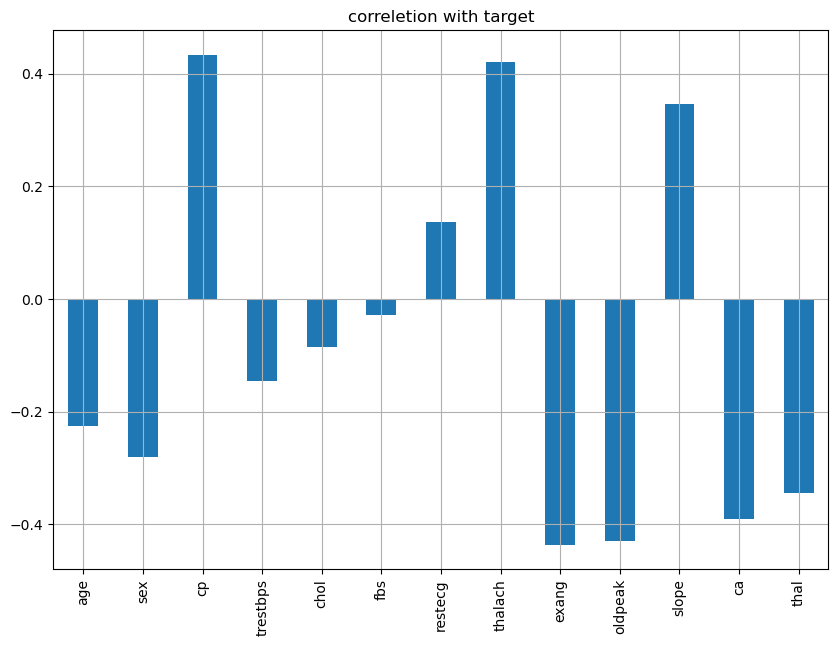

In [159]:
row.drop('target',axis=1).corrwith(row.target).plot(kind='bar',grid=True,figsize=(10,7),
                                                   title="correletion with target")
plt.show()

In [160]:
from sklearn.feature_selection import SelectPercentile, chi2

In [162]:
X= row.drop(['target'],axis=1)
y=row.target
SPercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=SPercentile.fit(X,y)

In [166]:
cols=SPercentile.get_support(indices=True)
print("Feuture index =",cols)
features=X.columns[cols]
print('Feuture =',list(features))

Feuture index = [ 0  1  2  3  4  7  8  9 10 11]
Feuture = ['age', 'sex', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']


In [167]:
row_score=pd.DataFrame({'features':X.columns,'Chi2Score':SPercentile.scores_,'pValue':SPercentile.pvalues_})
row_score.sort_values(by="Chi2Score",ascending=False)

,features,Chi2Score,pValue
7,thalach,188.320472,7.395102e-43
9,oldpeak,72.644253,1.552583e-17
11,ca,66.440765,3.605677e-16
2,cp,62.598098,2.534982e-15
8,exang,38.914377,4.428074e-10
4,chol,23.936394,9.957148e-07
0,age,23.286624,1.395673e-06
3,trestbps,14.823925,1.180286e-04
10,slope,9.804095,1.741237e-03
1,sex,7.576835,5.912318e-03


In [168]:
X=row[features]

In [169]:
y=row.target

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [172]:
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.3,random_state=42)

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score

In [178]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print('\=============Train Result=================')
        
        print(f'Accurancy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print('\=============Train Result=================')
        
        print(f'Accurancy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n \n Test clarssification Report \n', classification_report(y_test,pred,digits=2))

In [179]:
gbdt_clf=GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier()

# metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

In [180]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

\=============Train Result=================
Accurancy Score: 100.00%
\=============Train Result=================
Accurancy Score: 83.52%

 
 Test clarssification Report 
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



#Hyperparameter tuning 

In [181]:
from sklearn.model_selection import GridSearchCV

In [185]:
grid_param={'max_depth':range(4,8),
           'min_samples_split': range(2,8,2),
           'learning_rate':np.arange(0.1,0.3)}

In [186]:
grid=GridSearchCV(GradientBoostingClassifier(),param_grid=grid_param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([0.1]),
                         'max_depth': range(4, 8),
                         'min_samples_split': range(2, 8, 2)})

In [187]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 6}

In [188]:
gbdt_clf=GradientBoostingClassifier(max_depth=8,
                                   min_samples_leaf=2,learning_rate=0.2)

In [189]:
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=8, min_samples_leaf=2)

In [190]:
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(gbdt_clf,x_train,x_test,y_train,y_test,train=False)

\=============Train Result=================
Accurancy Score: 100.00%
\=============Train Result=================
Accurancy Score: 80.22%

 
 Test clarssification Report 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.83      0.80      0.82        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



#XGBOOSt 

ModuleNotFoundError: No module named 'xgboost'